# Project: Investigate a Dataset (TMDb movie data)
Table of Contents
Introduction
Data Wrangling
Exploratory Data Analysis
Conclusions

# Introduction
In this project I have investigated TMDb movies dataset which contains informationabout 10,000 movies ,including user ratings and revenue.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import csv
from datetime import datetime
import matplotlib.pyplot as plt

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

# Data Wrangling
In this section I will load the data get its information and check for duplicates and clean it

# General Properties
Loading the data

In [2]:
movies_df=pd.read_csv('tmdb-movies.csv')
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
movies_df.shape

(10866, 21)

statistical describtion

In [4]:
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


data types

In [5]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

duplicated rows

In [6]:
sum(movies_df.duplicated())

1

# Data Cleaning (making the data reasier and more accurate to deal with)
remove unnecessary columns (according to the planned questions)
remove duplicates
remove zeros

# remove unnecessary columns
columns to be removed: id, imdb_id, budget, revenue, homepage, tagline, cast, overview, keywords, release_date, vote_count,vote_average

In [7]:
columns_delete=['id', 'imdb_id', 'budget', 'revenue', 'homepage', 'tagline', 'cast', 'overview', 'keywords', 'release_date', 'vote_count','vote_average']
movies_df.drop(columns_delete, axis=1, inplace=True)
movies_df.head()

,popularity,original_title,director,runtime,genres,production_companies,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015,1.747999e+08,1.385749e+09


In [8]:
movies_df.shape

(10866, 9)

# remove duplicates

In [9]:
movies_df.drop_duplicates(keep = 'first', inplace = True)
movies_df.shape

(10865, 9)

# remove zero values

In [10]:
movies_df=movies_df[movies_df!=0].dropna()
movies_df.reset_index(drop=True, inplace=True)
movies_df.shape

(3807, 9)

# Exploratory Data Analysis

I will invetigate relation between the different variables and their highest and lowest values

# Q1 which movie had the highest and the lowest profit ?

In [12]:
movies_df['profit'] = movies_df['revenue_adj'] - movies_df['budget_adj']
movies_df.head()

,popularity,original_title,director,runtime,genres,production_companies,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,Insurgent,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,Furious 7,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015,1.747999e+08,1.385749e+09,1.210949e+09


In [13]:
movies_df.sort_values(['profit'],ascending=False)

,popularity,original_title,director,runtime,genres,production_companies,release_year,budget_adj,revenue_adj,profit
325,12.037933,Star Wars,George Lucas,121.0,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977,3.957559e+07,2.789712e+09,2.750137e+09
344,9.432768,Avatar,James Cameron,162.0,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009,2.408869e+08,2.827124e+09,2.586237e+09
1747,4.355219,Titanic,James Cameron,194.0,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997,2.716921e+08,2.506406e+09,2.234714e+09
3754,2.010733,The Exorcist,William Friedkin,122.0,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,1973,3.928928e+07,2.167325e+09,2.128036e+09
3498,2.563191,Jaws,Steven Spielberg,124.0,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,1975,2.836275e+07,1.907006e+09,1.878643e+09
...,...,...,...,...,...,...,...,...,...,...
1647,1.653031,Brother Bear,Aaron Blaise|Robert Walker,85.0,Animation|Adventure|Family|Fantasy,Walt Disney Pictures|Walt Disney Feature Anima...,2003,1.185353e+08,2.963382e+02,-1.185350e+08
716,1.189386,The 13th Warrior,John McTiernan,102.0,Adventure|Fantasy|Action,Touchstone Pictures,1999,2.094485e+08,8.076712e+07,-1.286813e+08
2446,0.948560,The Alamo,John Lee Hancock,137.0,Western|History|War,Imagine Entertainment|Touchstone Pictures,2004,1.673946e+08,2.980774e+07,-1.375868e+08
1911,1.214510,The Lone Ranger,Gore Verbinski,149.0,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,2013,2.386885e+08,8.357833e+07,-1.551102e+08


# Highest profit
Star Wars

# Lowest profit
The warrior's way

# Q2longest and shortest runtime?
longest runtime

In [14]:
movies_df.loc[movies_df['runtime'].idxmax()]

popularity                                                       0.534192
original_title                                                     Carlos
director                                                  Olivier Assayas
runtime                                                               338
genres                                       Crime|Drama|Thriller|History
production_companies    Egoli Tossell Film AG|Canal+|Arte France|Films...
release_year                                                         2010
budget_adj                                                        1.8e+07
revenue_adj                                                        871279
profit                                                       -1.71287e+07
Name: 649, dtype: object

shortest runtime

In [15]:
movies_df.loc[movies_df['runtime'].idxmin()]

popularity                               0.208637
original_title                        Kid's Story
director                      Shinichiro Watanabe
runtime                                        15
genres                  Science Fiction|Animation
production_companies                  Studio 4Â°C
release_year                                 2003
budget_adj                                11.8535
revenue_adj                               5.92676
profit                                   -5.92676
Name: 1738, dtype: object

# longest runtime
Carlos (338)

# shortest runtime
kid's story (15)

# Q3Highest and lowest popularity?

Highest popularity

In [16]:
movies_df.loc[movies_df['popularity'].idxmax()]

popularity                                                        32.9858
original_title                                             Jurassic World
director                                                  Colin Trevorrow
runtime                                                               124
genres                          Action|Adventure|Science Fiction|Thriller
production_companies    Universal Studios|Amblin Entertainment|Legenda...
release_year                                                         2015
budget_adj                                                       1.38e+08
revenue_adj                                                   1.39245e+09
profit                                                        1.25445e+09
Name: 0, dtype: object

In [17]:
movies_df.loc[movies_df['popularity'].idxmin()]

popularity                          0.010335
original_title          Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´
director                   Fyodor Bondarchuk
runtime                                  131
genres                            War|Action
production_companies     Art Pictures Studio
release_year                            2013
budget_adj                        2.8081e+07
revenue_adj                      6.37715e+07
profit                           3.56905e+07
Name: 2015, dtype: object

# Q4generes with highest and lowest popularity?

In [18]:
movies_df.groupby(['genres']).mean().sort_values(['popularity'],ascending=False)

,popularity,runtime,release_year,budget_adj,revenue_adj,profit
genres,,,,,,
Adventure|Drama|Science Fiction,24.949134,169.0,2014.000000,1.519800e+08,5.726906e+08,4.207106e+08
Adventure|Science Fiction|Thriller,13.112507,119.0,2015.000000,1.012000e+08,2.716190e+08,1.704191e+08
Action|Adventure|Science Fiction|Fantasy,11.173104,136.0,2015.000000,1.839999e+08,1.902723e+09,1.718723e+09
Action|Adventure|Science Fiction|Thriller,10.968490,110.5,2007.833333,1.019219e+08,4.189531e+08,3.170312e+08
Science Fiction|Adventure|Thriller,10.739009,123.0,2014.000000,1.151364e+08,6.927528e+08,5.776164e+08
...,...,...,...,...,...,...
Action|Horror|Mystery|Thriller,0.128169,111.0,2001.000000,1.847232e+07,2.009407e+05,-1.827138e+07
Horror|Family|Foreign,0.123920,95.0,2000.000000,2.785843e+07,1.716584e+07,-1.069259e+07
Drama|Foreign,0.094957,116.5,1995.000000,1.625371e+07,6.458273e+06,-9.795432e+06


# Most popular generes
Adventure|Drama|Science Fiction

# least popular genere
Drama|Comedy|Romance|Foreign

# Q5 number of movies released each year?

In [19]:
movies_df['count'] = 1
movies_df.groupby(['release_year']).count().sort_values(['count'])

,popularity,original_title,director,runtime,genres,production_companies,budget_adj,revenue_adj,profit,count
release_year,,,,,,,,,,
1969,4,4,4,4,4,4,4,4,4,4
1960,5,5,5,5,5,5,5,5,5,5
1965,5,5,5,5,5,5,5,5,5,5
1966,5,5,5,5,5,5,5,5,5,5
1963,6,6,6,6,6,6,6,6,6,6
1962,7,7,7,7,7,7,7,7,7,7
1964,7,7,7,7,7,7,7,7,7,7
1972,8,8,8,8,8,8,8,8,8,8
1968,9,9,9,9,9,9,9,9,9,9


# Q6 revenue W.R.T director?

In [20]:
movies_df.groupby(['director']).mean().sort_values(['revenue_adj'],ascending=False)

,popularity,runtime,release_year,budget_adj,revenue_adj,profit,count
director,,,,,,,
Irwin Winkler,1.136610,114.0,1995.0,3.148127e+07,1.583050e+09,1.551568e+09,1.0
Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,2.631987,79.0,1961.0,2.917944e+07,1.574815e+09,1.545635e+09,1.0
Richard Marquand,4.828854,135.0,1983.0,7.082424e+07,1.253819e+09,1.182995e+09,1.0
Chris Buck|Jennifer Lee,6.112766,102.0,2013.0,1.404050e+08,1.192711e+09,1.052306e+09,1.0
Roger Allers|Rob Minkoff,4.782688,89.0,1994.0,6.620002e+07,1.159592e+09,1.093392e+09,1.0
...,...,...,...,...,...,...,...
Benedikt Erlingsson,0.222776,85.0,2013.0,9.360334e+00,1.029637e+01,9.360334e-01,1.0
Bille August,0.450208,140.0,1993.0,3.773675e+07,9.056820e+00,-3.773674e+07,1.0
Peter Hall,0.183034,86.0,1995.0,9.158188e+06,8.585801e+00,-9.158179e+06,1.0


# director that brings the highest revenue
Irwin Winkler



# director that brings the lowest revenue
Shinichiro Watanabe

# Q7 What is revenu relation to budget?

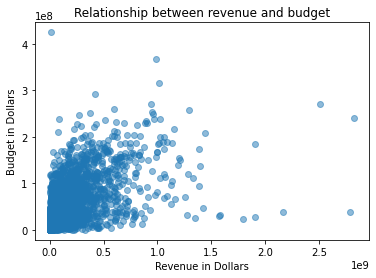

In [21]:
# x-axis
plt.xlabel('Revenue in Dollars')
# y-axis
plt.ylabel('Budget in Dollars')
# Title of the histogram
plt.title('Relationship between revenue and budget')
plt.scatter(movies_df['revenue_adj'], movies_df['budget_adj'], alpha=0.5)
plt.show()

notes Relationship between revenue and budget movie a steady sttate and not increased

# Conclusions
We can conclude that the action genere is the most popular and profitable genere as the movies with the highest profit and popularity are of action genere

We can also conclude that the number of movies released each year has increaed significantly

We can see also that most movies are in the low budget low revenue area

# References

https://bit.ly/3sQNCEX

https://bit.ly/3fF09r1

https://bit.ly/2PImjxZ

https://bit.ly/3moo5jY

https://bit.ly/3fN5zAv